# Generalized Linear Regretion Tool

In this note-book I will be presenting a class that can be used on to preform linear regretion analitics on any dataset that has been poperly cleaned for analisis.

# Analyze Class

__init__ - Takes the imput of two colums from a cleaned exel file as the x and y variables respectivly.

plot - Uses pyplotlib to create and show a scater plot if gd_linreg has been executed beforhand it will plot the linear regretion line that was found.

gd_linreg - Function that uses gradient desent in order to fit the least squared regretion line to the dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class analyze:
    def __init__(self, xvar, yvar):
        self.xvar = xvar
        self.yvar = yvar
    def plot(self):
        x = self.xvar
        y = self.yvar
        plt.plot( x, y, 'o')
        plt.xlabel(self.xvar.name)
        plt.ylabel(self.yvar.name)
        plt.show()
    def gd_linreg(self, epochs, learningrate):
        print(epochs)
        #
        m = (self.yvar.iloc[-1]-self.yvar[0])/self.xvar.iloc[-1]
        b = self.yvar[0]+200
        for n in range(1,epochs):
            errorsum = 0; i = 0;
            for n in self.xvar:
                y = self.yvar[i]
                pred = (m*self.xvar[i])+b
                errorsum += (-2)*self.xvar[i]*(y - pred)
                i += 1
            m = m - (1/i)*(learningrate*errorsum)
            errorsum = 0; i = 0
            for n in self.xvar:
                y = self.yvar[i]
                pred = (m*self.xvar[i])+b
                errorsum += (-2)*(y - pred)
                i += 1
            b = b - (1/i)*(learningrate*errorsum)
        x = np.linspace(self.xvar[0], self.xvar[i-1])
        ypred = m*x+b
        plt.plot(x,ypred)
        print("y={}x+{}".format(m, b))
        errorsqrsum = 0; i = 0;
        for n in self.xvar:
            y = self.yvar[i]
            pred = (m*self.xvar[i])+b
            errorsqrsum += (y - pred)**2
            i += 1
        ymean = sum(self.yvar)/i
        totsumsqrs = 0; i = 0;
        for n in self.xvar:
            y = self.yvar[i]
            totsumsqrs += (y - ymean)**2
        print("r**2 = {}".format(1-(errorsqrsum/totsumsqrs)))

# Example Analisis On Statistics on Obesity, Physical Activity and Diet 
Data colected by NHS Digital - https://digital.nhs.uk/data-and-information/publications/statistical/statistics-on-obesity-physical-activity-and-diet

Below is analisis preformed on Table 5 of the data collected by NHS Digital. It is a chart that gives the number of patients with Finished admission episodes with a primary diagnosis of obesity, Finished admission episodes with a primary or secondary diagnosis of obesity, and Finished consultant episodes with a primary diagnosis of obesity and a main or secondary procedure of 'Bariatric Surgery' related to their deprevation level. Deprevation level comes from the Index of multiple deprivation (IMD) decile(1-Most Depraved 10-Least Depraved).

   Deprevation Index  \
0                  1   
1                  2   
2                  3   
3                  4   
4                  5   
5                  6   
6                  7   
7                  8   
8                  9   
9                 10   

   Finished admission episodes with a primary diagnosis of obesity  \
0                                               1751                 
1                                               1782                 
2                                               1615                 
3                                               1255                 
4                                               1109                 
5                                                951                 
6                                                862                 
7                                                701                 
8                                                647                 
9                                  

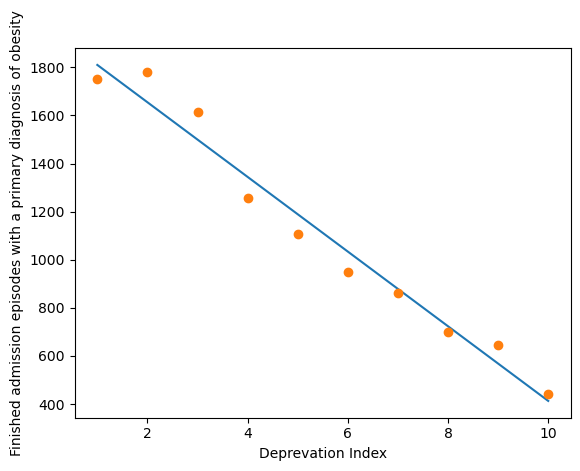

In [3]:
#import exel file with pandas and create scater plot.
FAE_Pri = pd.read_excel(r'C:\Users\nickp\OneDrive\Documents\Programing\Application Practice\Obesity\Obesity_by_Deprevation_lvl.xlsx', 1)
print(FAE_Pri)
#Use analyze class to preform liner regretion and create a scater plot.
FAE_Pri_analisis = analyze(FAE_Pri.loc[:,"Deprevation Index"], FAE_Pri.loc[:,"Finished admission episodes with a primary diagnosis of obesity"])
FAE_Pri_analisis.gd_linreg(1000,.01)
FAE_Pri_analisis.plot()


With this model we can see that there is a strong negative corilation between the Deprevation index and cases of Finished admission episodes with a primary diagnosis of obesity. When we look at the coefficient of determination(r**2) we can deduce that about 98.4% of variation in Finished admission episodes with a primary diagnosis of obesity can be explained by the deprevation index.

1000
y=-3.2779312617726406x+39.003003138932876
r**2 = 0.9761573387750365


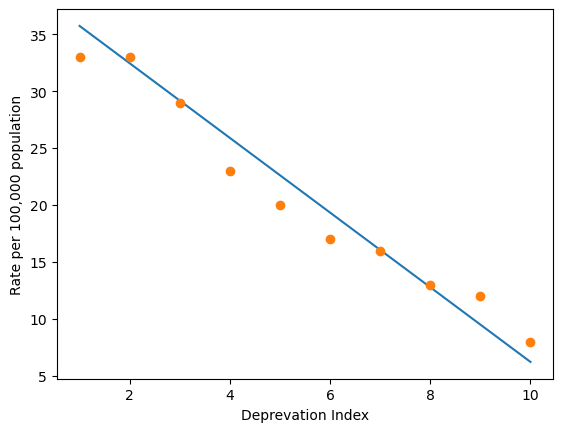

In [4]:
#
FAE_Pri_Per_100000_analisis = analyze(FAE_Pri.loc[:,"Deprevation Index"], FAE_Pri.loc[:,"Rate per 100,000 population"])
FAE_Pri_Per_100000_analisis.gd_linreg(1000,.01)
FAE_Pri_Per_100000_analisis.plot()

Here we see that even when we use a percentage instead of the raw amount of people diagnosed with obesity the strong corelation is maintend. Specificaly we can conclude that about 97.6% of variation in the amount of people diagnosed with obesity per 100,000 people can be explained by there level of deprevation.